# Initial Setup 

In [60]:
import sys
sys.path.insert(0, "../..")

In [61]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [63]:
PATH="/diskA/jethro/nips-papers"

# Data Exploration

In [64]:
import glob
files = glob.glob(f'{PATH}/*.*')
files[:5]

['/diskA/jethro/nips-papers/database.sqlite',
 '/diskA/jethro/nips-papers/dictionary.pkl',
 '/diskA/jethro/nips-papers/corpus.mm',
 '/diskA/jethro/nips-papers/corpus.mm.index']

In [65]:
import sqlite3
conn = sqlite3.connect(f'{PATH}/database.sqlite')

In [66]:
import pandas as pd

In [67]:
papers = pd.read_sql_query("select * from papers;", conn)

In [68]:
papers.sample(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
6063,6106,2016,Learning Additive Exponential Family Graphical...,Poster,6106-learning-additive-exponential-family-grap...,We investigate a subclass of exponential famil...,Learning Additive Exponential Family Graphical...
6848,6892,2017,Continual Learning with Deep Generative Replay,Poster,6892-continual-learning-with-deep-generative-r...,Attempts to train a comprehensive artificial i...,Continual Learning with Deep Generative Replay...
2386,2425,2003,Bounded Invariance and the Formation of Place ...,,2425-bounded-invariance-and-the-formation-of-p...,Abstract Missing,Bounded invariance and the formation of\nplace...
2372,2411,2003,On the Concentration of Expectation and Approx...,,2411-on-the-concentration-of-expectation-and-a...,Abstract Missing,On the concentration of expectation and\nappro...
3279,3318,2007,Reinforcement Learning in Continuous Action Sp...,,3318-reinforcement-learning-in-continuous-acti...,Abstract Missing,Reinforcement Learning in Continuous Action Sp...


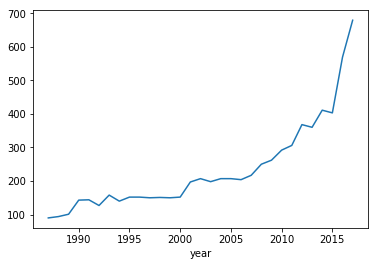

In [69]:
paper_count_years = papers.groupby("year")["id"].nunique()
paper_count_years.plot()

In [70]:
from urop.nlp import clean_text
papers["clean_text"] = papers["paper_text"].apply(clean_text)

In [71]:
corpus = papers["clean_text"].tolist()

# Building the Dictionary and Corpus

In [73]:
from gensim.corpora import Dictionary
from gensim.corpora.mmcorpus import MmCorpus

In [74]:
dct = Dictionary(corpus)

2018-03-10 15:19:17,149 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-03-10 15:19:21,692 : INFO : built Dictionary(700039 unique tokens: ['achieve', 'addressing', 'advance', 'algorithm', 'algorithmletter']...) from 7241 documents (total 8365103 corpus positions)


In [75]:
dct.filter_extremes(no_below=5, no_above=0.5)

2018-03-10 15:19:22,297 : INFO : discarding 645785 tokens: [('algorithm', 5998), ('algorithmletter', 1), ('almighty', 1), ('analogicallyinformation', 1), ('analysis', 5483), ('anddx', 4), ('andinquires', 1), ('andix', 3), ('andposition', 4), ('andtrace', 3)]...
2018-03-10 15:19:22,298 : INFO : keeping 54254 tokens which were in no less than 5 and no more than 3620 (=50.0%) documents
2018-03-10 15:19:22,445 : INFO : resulting dictionary: Dictionary(54254 unique tokens: ['achieve', 'addressing', 'advance', 'angle', 'anoperator']...)


In [76]:
mm_corpus = [dct.doc2bow(text) for text in corpus]

In [77]:
MmCorpus.serialize(f'{PATH}/corpus.mm', mm_corpus)

2018-03-10 15:19:25,223 : INFO : storing corpus in Matrix Market format to /diskA/jethro/nips-papers/corpus.mm
2018-03-10 15:19:25,228 : INFO : saving sparse matrix to /diskA/jethro/nips-papers/corpus.mm
2018-03-10 15:19:25,228 : INFO : PROGRESS: saving document #0
2018-03-10 15:19:25,423 : INFO : PROGRESS: saving document #1000
2018-03-10 15:19:25,633 : INFO : PROGRESS: saving document #2000
2018-03-10 15:19:25,884 : INFO : PROGRESS: saving document #3000
2018-03-10 15:19:26,180 : INFO : PROGRESS: saving document #4000
2018-03-10 15:19:26,502 : INFO : PROGRESS: saving document #5000
2018-03-10 15:19:26,828 : INFO : PROGRESS: saving document #6000
2018-03-10 15:19:27,177 : INFO : PROGRESS: saving document #7000
2018-03-10 15:19:27,268 : INFO : saved 7241x54254 matrix, density=0.598% (2350382/392853214)
2018-03-10 15:19:27,269 : INFO : saving MmCorpus index to /diskA/jethro/nips-papers/corpus.mm.index


In [78]:
dct.save(f'{PATH}/dictionary.pkl')

2018-03-10 15:19:27,288 : INFO : saving Dictionary object under /diskA/jethro/nips-papers/dictionary.pkl, separately None
2018-03-10 15:19:27,303 : INFO : saved /diskA/jethro/nips-papers/dictionary.pkl


In [79]:
time_seq = paper_count_years.tolist()

In [80]:
import pickle

In [82]:
with open(f'{PATH}/timeseq.lst', 'wb') as f:
    pickle.dump(time_seq, f)